In [38]:
import awkward as ak
import numpy as np
import uproot as uproot
import matplotlib.pyplot as plt
import mplhep as hep
import vector as vec

from utils import *
from utilsPCA import *
from plotting import *
from isolation import *

import matplotlib

In [39]:
matplotlib.rcParams.update(matplotlib.rcParamsDefault)
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18) 
matplotlib.rc('axes', labelsize=18, titlesize=20)
matplotlib.rc('legend', fontsize=16)

#plt.style.use(hep.style.CMS)
%matplotlib inline

In [40]:
filename='/eos/user/a/aperego/Timing/root_files/Zee_noPU/histo_Zee_noPU.root'
file = uproot.open(filename)

In [41]:
file.keys()

['mtdEleIsoNtupler;1',
 'mtdEleIsoNtupler/electrons;1',
 'mtdEleIsoNtupler/tracks;1',
 'mtdEleIsoNtupler/vertices;1']

In [42]:
electrons = file["mtdEleIsoNtupler/electrons"]
tracks = file["mtdEleIsoNtupler/tracks"]
vertices = file["mtdEleIsoNtupler/vertices"]

In [43]:
#tracks.keys()

In [44]:
NEVENTS = 9000

In [45]:
nEle = electrons['nEle'].array()[:NEVENTS]
ele_energy = electrons['ele_energy'].array()[:NEVENTS]
ele_pt = electrons['ele_pt'].array()[:NEVENTS]
ele_eta = electrons['ele_eta'].array()[:NEVENTS]
ele_phi = electrons['ele_phi'].array()[:NEVENTS]
ele_dz = electrons['ele_dz'].array()[:NEVENTS]
ele_dxy = electrons['ele_dxy'].array()[:NEVENTS]
ele_track = electrons['ele_track'].array()[:NEVENTS]
ele_barrel = electrons['ele_barrel'].array()[:NEVENTS]
ele_prompt = electrons['ele_prompt'].array()[:NEVENTS]
ele_time = electrons['ele_time'].array()[:NEVENTS]
ele_timeErr = electrons['ele_timeErr'].array()[:NEVENTS]
ele_mva = electrons['ele_mva'].array()[:NEVENTS]
sum_pT = electrons['sum_pT'].array()[:NEVENTS]
nTracks = electrons['nTracks'].array()[:NEVENTS]

In [46]:
# workaround!!
arg=ak.argmax(ak.sum(ele_prompt, axis=1))
print(arg, ak.max(ak.sum(ele_prompt, axis=1)), ele_pt[arg])
np.asarray(ele_prompt[arg])[2] = False

1701 3 [56.5, 26.3, 13.3]


In [47]:
ele_sim_pt = electrons['ele_sim_pt'].array()[:NEVENTS]
ele_sim_time = electrons['ele_sim_time'].array()[:NEVENTS]
track_sim_pt = tracks['track_sim_pt'].array()[:NEVENTS]
track_sim_time = tracks['track_sim_time'].array()[:NEVENTS]

In [48]:
track_pt = tracks['track_pt'].array()[:NEVENTS]
track_dt_ele = tracks['track_dt_ele'].array()[:NEVENTS]
track_dt_vtx = tracks['track_dt_vtx'].array()[:NEVENTS]
track_dz_ele = tracks['track_dz_ele'].array()[:NEVENTS]
track_PVweight = tracks['track_PVweight'].array()[:NEVENTS]
track_time = tracks['track_time'].array()[:NEVENTS]
track_timeErr = tracks['track_timeErr'].array()[:NEVENTS]
track_mva = tracks['track_mva'].array()[:NEVENTS]
track_gen_matched = tracks['track_gen_matched'].array()[:NEVENTS]

In [49]:
vertex_time = vertices['vertex_time'].array()[:NEVENTS]
vertex_timeErr = vertices['vertex_timeErr'].array()[:NEVENTS]
vertex_nTracks = vertices['vertex_NumberofTracks'].array()[:NEVENTS]
event = vertices['event'].array()[:NEVENTS]

In [50]:
for i in range(10):
    print(f'There are {nEle[i]} in the {i+1}° event of which {sum(ele_prompt[i])} prompt')

There are 1 in the 1° event of which 1 prompt
There are 2 in the 2° event of which 2 prompt
There are 1 in the 3° event of which 1 prompt
There are 1 in the 4° event of which 1 prompt
There are 2 in the 5° event of which 2 prompt
There are 3 in the 6° event of which 2 prompt
There are 2 in the 7° event of which 2 prompt
There are 0 in the 8° event of which 0 prompt
There are 2 in the 9° event of which 2 prompt
There are 1 in the 10° event of which 1 prompt


In [51]:
print(f'Number of events: {len(event)}')

Number of events: 9000


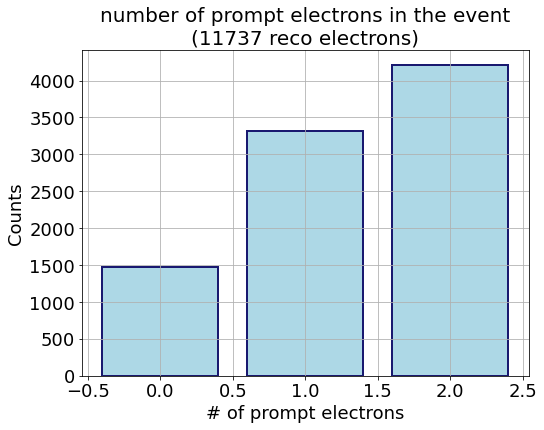

In [52]:
plt.figure(figsize=(8,6))
plt.hist(ak.sum(ele_prompt, axis=1), bins=3, range=(-0.5,2.5), color='lightblue', ec="midnightblue", lw=2, rwidth=0.8)
plt.title(f'number of prompt electrons in the event\n({ak.sum(ak.sum(ele_prompt, axis=1))} reco electrons)')
plt.xlabel("# of prompt electrons")
plt.ylabel("Counts")
plt.grid()
plt.show()

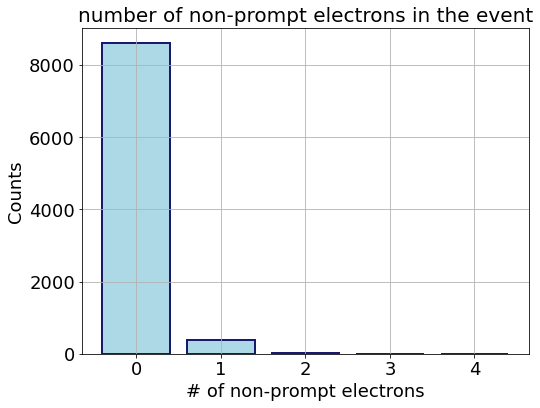

In [53]:
plt.figure(figsize=(8,6))
plt.hist(ak.count(ele_prompt, axis=1)-ak.sum(ele_prompt, axis=1), bins=5, range=(-0.5,4.5), color='lightblue', ec="midnightblue", lw=2, rwidth=0.8)
plt.title("number of non-prompt electrons in the event")
plt.xlabel("# of non-prompt electrons")
plt.ylabel("Counts")
plt.grid()
plt.show()

## efficiency studies

In [54]:
MVA_CUT = 0.5
NSIGMA = 3
ISO_CUT = 0.03
ELE_DZ = 0.2

## scan in dz, iso, sigma

In [55]:
# for ELE_DZ in [0.1, 0.2, 0.3]:
#     for ISO_CUT in [0.03,0.05,0.07,0.09]:
#         for NSIGMA in [1,2,3]:

#             ele_pt_B, ele_pt_noMTD_B, ele_pt_MTD_B, ele_sim_pt_MTD_B, ele_gen_pt_MTD_B = isoefficiency(ele_prompt[ele_barrel], ele_track[ele_barrel], ele_sim_pt[ele_barrel], 
#                           ele_dz[ele_barrel], ele_dxy[ele_barrel], track_sim_pt[ele_barrel], track_dz_ele[ele_barrel], track_sim_time[ele_barrel], 
#                           ele_sim_time[ele_barrel], track_time[ele_barrel], track_timeErr[ele_barrel], ele_time[ele_barrel], ele_timeErr[ele_barrel], 
#                           track_mva[ele_barrel], ele_mva[ele_barrel], track_gen_matched[ele_barrel], 
#                           NSIGMA=NSIGMA,ELE_DZ=ELE_DZ,ISO_CUT=ISO_CUT)

#             ele_pt_E, ele_pt_noMTD_E, ele_pt_MTD_E, ele_sim_pt_MTD_E, ele_gen_pt_MTD_E = isoefficiency(ele_prompt[~ele_barrel], ele_track[~ele_barrel], ele_sim_pt[~ele_barrel], 
#                           ele_dz[~ele_barrel], ele_dxy[~ele_barrel], track_sim_pt[~ele_barrel], 
#                           track_dz_ele[~ele_barrel], track_sim_time[~ele_barrel], ele_sim_time[~ele_barrel], track_time[~ele_barrel], track_timeErr[~ele_barrel], 
#                           ele_time[~ele_barrel], ele_timeErr[~ele_barrel], track_mva[~ele_barrel], ele_mva[~ele_barrel], track_gen_matched[~ele_barrel], 
#                           NSIGMA=NSIGMA,ELE_DZ=ELE_DZ,ISO_CUT=ISO_CUT)             

#             #plt.style.use(hep.style.CMS)
#             fig = plt.figure(figsize=(16,7))
#             plt.suptitle("dt cut at " + str(NSIGMA) + " $\sigma$, ele dz: " + str(ELE_DZ) + "cm, ISO CUT: " + str(ISO_CUT), fontsize=20, y=0.97)
#             bins=np.array([10,20,30,40,50,60,70,80])
#             ax = iso_eff_plot(bins, ele_pt_E, ele_pt_noMTD_E, ele_pt_MTD_E, ele_sim_pt_MTD_E, ele_gen_pt_MTD_E, title="iso efficiency on electrons - ETL (errors*0.2)", pos=122)
#             plt.grid()
#             iso_eff_plot(bins, ele_pt_B, ele_pt_noMTD_B, ele_pt_MTD_B, ele_sim_pt_MTD_B, ele_gen_pt_MTD_B, title="iso efficiency on electrons - BTL (errors*0.2)", pos=121, ax=ax)
#             plt.grid()
#             fig.tight_layout()
#             plt.savefig("plots/iso_eff_dt_" + str(NSIGMA) + "s_dz_"+ str(ELE_DZ) + "_ISOcut_" + str(ISO_CUT)+".png")
#             plt.close()

## efficiency - SIM vs RECO

In [56]:
ele_pt_B, ele_pt_noMTD_B, ele_pt_MTD_B, ele_sim_pt_MTD_B, ele_gen_pt_MTD_B = isoefficiency(ele_prompt[ele_barrel], ele_track[ele_barrel], ele_sim_pt[ele_barrel], ele_pt[ele_barrel], 
                          ele_dz[ele_barrel], ele_dxy[ele_barrel], track_sim_pt[ele_barrel], track_pt[ele_barrel], track_dz_ele[ele_barrel], track_sim_time[ele_barrel], 
                          ele_sim_time[ele_barrel], track_time[ele_barrel], track_timeErr[ele_barrel], ele_time[ele_barrel], ele_timeErr[ele_barrel], 
                          track_mva[ele_barrel], ele_mva[ele_barrel], track_gen_matched[ele_barrel], 
                          NSIGMA=2,ELE_DZ=0.2,ISO_CUT=0.05)

ele_pt_E, ele_pt_noMTD_E, ele_pt_MTD_E, ele_sim_pt_MTD_E, ele_gen_pt_MTD_E = isoefficiency(ele_prompt[~ele_barrel], ele_track[~ele_barrel], ele_sim_pt[~ele_barrel], ele_pt[~ele_barrel], 
                          ele_dz[~ele_barrel], ele_dxy[~ele_barrel], track_sim_pt[~ele_barrel], track_pt[~ele_barrel], 
                          track_dz_ele[~ele_barrel], track_sim_time[~ele_barrel], ele_sim_time[~ele_barrel], track_time[~ele_barrel], track_timeErr[~ele_barrel], 
                          ele_time[~ele_barrel], ele_timeErr[~ele_barrel], track_mva[~ele_barrel], ele_mva[~ele_barrel], track_gen_matched[~ele_barrel], 
                          NSIGMA=2,ELE_DZ=0.2,ISO_CUT=0.05)

In [57]:
SCALE = 0.2

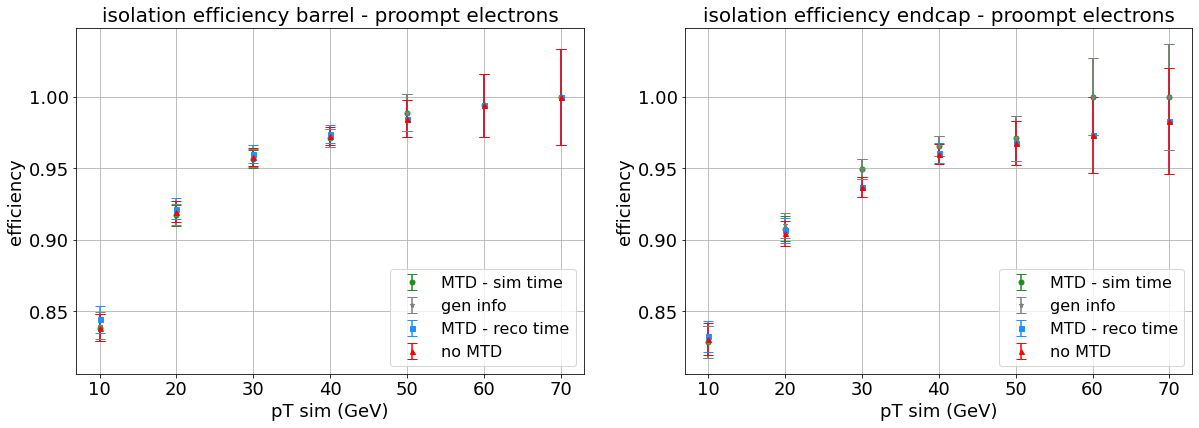

In [58]:
bins=np.array([10,20,30,40,50,60,70,80])
pt_tot, bins = np.histogram(ele_pt_B, bins=bins)

MTD_sim, err_sim_MTD = list2hist(ele_sim_pt_MTD_B, pt_tot, bins, SCALE)
MTD_gen, err_gen_MTD = list2hist(ele_gen_pt_MTD_B, pt_tot, bins, SCALE)
MTD, err_MTD = list2hist(ele_pt_MTD_B, pt_tot, bins, SCALE)
noMTD, err_noMTD = list2hist(ele_pt_noMTD_B, pt_tot, bins, SCALE)

#plt.style.use(hep.style.CMS)
plt.figure(figsize=(20,14))
ax=plt.subplot(221)
plt.errorbar(bins[:-1], MTD_sim, err_sim_MTD, c="forestgreen", label ="MTD - sim time", fmt = "o", markersize=5, mfc="forestgreen", mec="forestgreen", ecolor="forestgreen", capsize=5, linestyle='')
plt.errorbar(bins[:-1], MTD_gen, err_gen_MTD, c="grey", label ="gen info", fmt = "*", markersize=5, mfc="grey", mec="grey", ecolor="grey", capsize=5, linestyle='')
plt.errorbar(bins[:-1], MTD, err_MTD, c="dodgerblue", label ="MTD - reco time", fmt = "s", markersize=5, mfc="dodgerblue", mec="dodgerblue", ecolor="dodgerblue", capsize=5, linestyle='')
plt.errorbar(bins[:-1], noMTD, err_noMTD, c="red", label ="no MTD", fmt = "^", markersize=5, mfc="red", mec="red", ecolor="red", capsize=5, linestyle='')
plt.title("isolation efficiency barrel - proompt electrons")
plt.xlabel("pT sim (GeV)")
plt.ylabel("efficiency")
plt.grid()
plt.legend(loc="lower right")

################################

pt_tot, bins = np.histogram(ele_pt_E, bins=bins)

MTD_sim, err_sim_MTD = list2hist(ele_sim_pt_MTD_E, pt_tot, bins, SCALE)
MTD_gen, err_gen_MTD = list2hist(ele_gen_pt_MTD_E, pt_tot, bins, SCALE)
MTD, err_MTD = list2hist(ele_pt_MTD_E, pt_tot, bins, SCALE)
noMTD, err_noMTD = list2hist(ele_pt_noMTD_E, pt_tot, bins, SCALE)

plt.subplot(222, sharey=ax)
plt.errorbar(bins[:-1], MTD_sim, err_sim_MTD, c="forestgreen", label ="MTD - sim time", fmt = "o", markersize=5, mfc="forestgreen", mec="forestgreen", ecolor="forestgreen", capsize=5, linestyle='')
plt.errorbar(bins[:-1], MTD_gen, err_gen_MTD, c="grey", label ="gen info", fmt = "*", markersize=5, mfc="grey", mec="grey", ecolor="grey", capsize=5, linestyle='')
plt.errorbar(bins[:-1], MTD, err_MTD, c="dodgerblue", label ="MTD - reco time", fmt = "s", markersize=5, mfc="dodgerblue", mec="dodgerblue", ecolor="dodgerblue", capsize=5, linestyle='')
plt.errorbar(bins[:-1], noMTD, err_noMTD, c="red", label ="no MTD", fmt = "^", markersize=5, mfc="red", mec="red", ecolor="red", capsize=5, linestyle='')
plt.title("isolation efficiency endcap - proompt electrons")
plt.xlabel("pT sim (GeV)")
plt.ylabel("efficiency")
plt.grid()
plt.legend(loc="lower right")

plt.show()

## save isolation for ROC

In [59]:
ele_iso_noMTD_B, ele_iso_MTD_B, ele_sim_iso_MTD_B, ele_gen_iso_MTD_B = isolation(ele_prompt[ele_barrel], ele_track[ele_barrel], ele_sim_pt[ele_barrel], ele_pt[ele_barrel], 
                          ele_dz[ele_barrel], ele_dxy[ele_barrel], track_sim_pt[ele_barrel], track_pt[ele_barrel], track_dz_ele[ele_barrel], track_sim_time[ele_barrel], 
                          ele_sim_time[ele_barrel], track_time[ele_barrel], track_timeErr[ele_barrel], ele_time[ele_barrel], ele_timeErr[ele_barrel], 
                          track_mva[ele_barrel], ele_mva[ele_barrel], track_gen_matched[ele_barrel], 
                          NSIGMA=3,ELE_DZ=0.2)

ele_iso_noMTD_E, ele_iso_MTD_E, ele_sim_iso_MTD_E, ele_gen_iso_MTD_E = isolation(ele_prompt[~ele_barrel], ele_track[~ele_barrel], ele_sim_pt[~ele_barrel], ele_pt[~ele_barrel], 
                          ele_dz[~ele_barrel], ele_dxy[~ele_barrel], track_sim_pt[~ele_barrel], track_pt[~ele_barrel], 
                          track_dz_ele[~ele_barrel], track_sim_time[~ele_barrel], ele_sim_time[~ele_barrel], track_time[~ele_barrel], track_timeErr[~ele_barrel], 
                          ele_time[~ele_barrel], ele_timeErr[~ele_barrel], track_mva[~ele_barrel], ele_mva[~ele_barrel], track_gen_matched[~ele_barrel], 
                          NSIGMA=3,ELE_DZ=0.2)

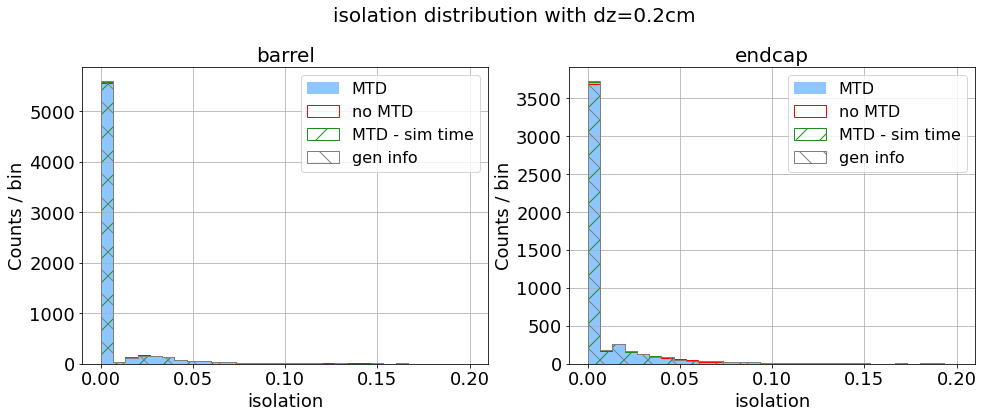

In [60]:
bins=30

plt.figure(figsize=(16,12))
plt.suptitle("isolation distribution with dz=0.2cm", fontsize=20, y=0.95)

ran=(0,0.2)
plt.subplot(221)
plt.hist(ele_iso_MTD_B, bins=30, color='dodgerblue', label="MTD", alpha=0.5, range=ran)
plt.hist(ele_iso_noMTD_B, bins=bins, color='red', label="no MTD", histtype="step", range=ran)
plt.hist(ele_sim_iso_MTD_B, bins=bins, color='forestgreen', label="MTD - sim time", histtype="step", range=ran, hatch="/")
plt.hist(ele_gen_iso_MTD_B, bins=bins, color='grey', label="gen info", histtype="step", range=ran, hatch="\\")
plt.title("barrel")
plt.xlabel("isolation")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

ran2=ran
plt.subplot(222)
plt.hist(ele_iso_MTD_E, bins=bins, color='dodgerblue', label="MTD", alpha=0.5, range=ran2)
plt.hist(ele_iso_noMTD_E, bins=bins, color='red', label="no MTD", histtype="step", range=ran2)
plt.hist(ele_sim_iso_MTD_E, bins=bins, color='forestgreen', label="MTD - sim time", histtype="step", range=ran2, hatch="/")
plt.hist(ele_gen_iso_MTD_E, bins=bins, color='grey', label="gen info", histtype="step", range=ran2, hatch="\\")
plt.title("endcap")
plt.xlabel("isolation")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

plt.show()

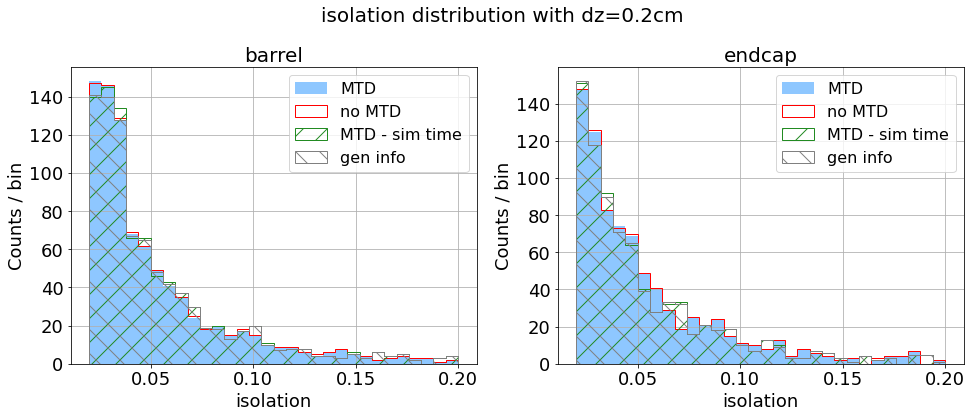

In [61]:
bins=30

plt.figure(figsize=(16,12))
plt.suptitle("isolation distribution with dz=0.2cm", fontsize=20, y=0.95)

ran=(0.02,0.2)
plt.subplot(221)
plt.hist(ele_iso_MTD_B, bins=30, color='dodgerblue', label="MTD", alpha=0.5, range=ran)
plt.hist(ele_iso_noMTD_B, bins=bins, color='red', label="no MTD", histtype="step", range=ran)
plt.hist(ele_sim_iso_MTD_B, bins=bins, color='forestgreen', label="MTD - sim time", histtype="step", range=ran, hatch="/")
plt.hist(ele_gen_iso_MTD_B, bins=bins, color='grey', label="gen info", histtype="step", range=ran, hatch="\\")
plt.title("barrel")
plt.xlabel("isolation")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

ran2=ran
plt.subplot(222)
plt.hist(ele_iso_MTD_E, bins=bins, color='dodgerblue', label="MTD", alpha=0.5, range=ran2)
plt.hist(ele_iso_noMTD_E, bins=bins, color='red', label="no MTD", histtype="step", range=ran2)
plt.hist(ele_sim_iso_MTD_E, bins=bins, color='forestgreen', label="MTD - sim time", histtype="step", range=ran2, hatch="/")
plt.hist(ele_gen_iso_MTD_E, bins=bins, color='grey', label="gen info", histtype="step", range=ran2, hatch="\\")
plt.title("endcap")
plt.xlabel("isolation")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

plt.show()

In [62]:
np.savetxt("sig_ele_iso_noMTD_B_0PU.txt", ele_iso_noMTD_B)
np.savetxt("sig_ele_iso_noMTD_E_0PU.txt", ele_iso_noMTD_E)
np.savetxt("sig_ele_iso_MTD_B_0PU.txt", ele_iso_MTD_B)
np.savetxt("sig_ele_iso_MTD_E_0PU.txt", ele_iso_MTD_E)
np.savetxt("sig_ele_sim_iso_MTD_B_0PU.txt", ele_sim_iso_MTD_B)
np.savetxt("sig_ele_sim_iso_MTD_E_0PU.txt", ele_sim_iso_MTD_E)
np.savetxt("sig_ele_gen_iso_MTD_B_0PU.txt", ele_gen_iso_MTD_B)
np.savetxt("sig_ele_gen_iso_MTD_E_0PU.txt", ele_gen_iso_MTD_E)

In [63]:
#iso_step = np.linspace(0.02, 0.2, 50)
iso_sig_noMTD_B, iso_sig_MTD_B, iso_sig_sim_MTD_B, iso_sig_gen_MTD_B = iso_for_plot(ele_iso_noMTD_B, ele_iso_MTD_B, ele_sim_iso_MTD_B, ele_gen_iso_MTD_B)
iso_sig_noMTD_E, iso_sig_MTD_E, iso_sig_sim_MTD_E, iso_sig_gen_MTD_E = iso_for_plot(ele_iso_noMTD_E, ele_iso_MTD_E, ele_sim_iso_MTD_E, ele_gen_iso_MTD_E)

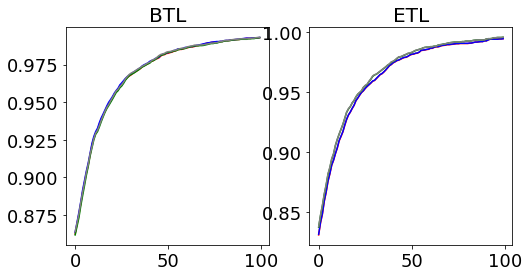

In [64]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title("BTL")
plt.plot(iso_sig_noMTD_B, c="r")
plt.plot(iso_sig_MTD_B, c="b")
plt.plot(iso_sig_sim_MTD_B, c="green")
plt.plot(iso_sig_gen_MTD_B, c="grey")

plt.subplot(122)
plt.title("ETL")
plt.plot(iso_sig_noMTD_E, c="r")
plt.plot(iso_sig_MTD_E, c="b")
plt.plot(iso_sig_sim_MTD_E, c="green")
plt.plot(iso_sig_gen_MTD_E, c="grey")

plt.show()

## dt distribution

In [65]:
ele_dt_B, ele_reco_dt_B, nosim_B, noreco_B = dt_distribution(ele_prompt[ele_barrel], ele_track[ele_barrel], ele_dz[ele_barrel], ele_dxy[ele_barrel], ele_sim_time[ele_barrel], ele_time[ele_barrel], ele_timeErr[ele_barrel], 
                                                                     track_dz_ele[ele_barrel], track_sim_time[ele_barrel], track_time[ele_barrel], track_timeErr[ele_barrel], ELE_DZ=0.2)
ele_dt_E, ele_reco_dt_E, nosim_E, noreco_E = dt_distribution(ele_prompt[~ele_barrel], ele_track[~ele_barrel], ele_dz[~ele_barrel], ele_dxy[~ele_barrel], ele_sim_time[~ele_barrel], ele_time[~ele_barrel], ele_timeErr[~ele_barrel], 
                                                                     track_dz_ele[~ele_barrel], track_sim_time[~ele_barrel], track_time[~ele_barrel], track_timeErr[~ele_barrel], ELE_DZ=0.2)

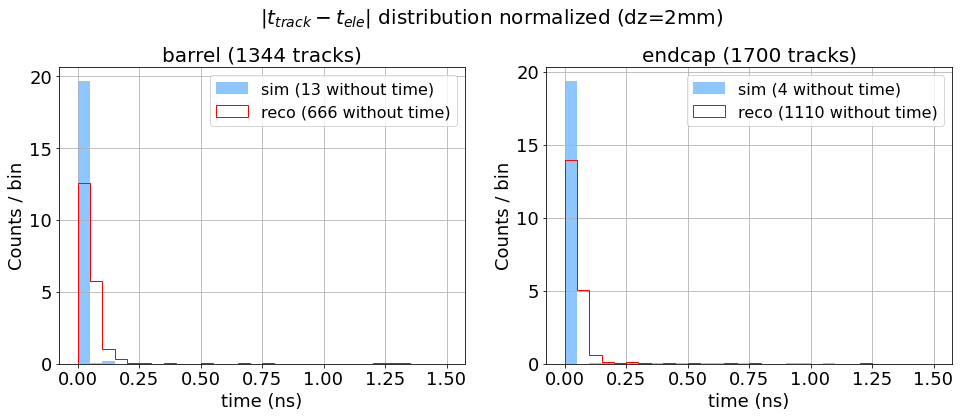

In [66]:
bins=30

plt.figure(figsize=(16,12))
plt.suptitle("$|t_{track}-t_{ele}|$ distribution normalized (dz=2mm)", fontsize=20, y=0.95)

plt.subplot(221)
ran = (0,1.5)
nt = len(ele_dt_B[ele_dt_B < -98])
plt.hist(ele_dt_B, bins=30, color='dodgerblue', label=f'sim ({nosim_B} without time)', alpha=0.5, range=ran, density=True)
nt = len(ele_reco_dt_B[ele_reco_dt_B == 0])
plt.hist(ele_reco_dt_B, bins=bins, color='red', label=f'reco ({noreco_B} without time)', histtype="step", range=ran, density=True)
#plt.hist(ele_reco_dt_matched_B, bins=bins, color='forestgreen', label="reco matched with sim", histtype="step", range=ran, hatch="/", density=True)
plt.title(f'barrel ({len(ele_dt_B)} tracks)')
plt.xlabel("time (ns)")
plt.ylabel("Counts normalized / bin")
plt.grid() 
plt.legend()

plt.subplot(222)
nt = len(ele_dt_E[ele_dt_E < -98])
plt.hist(ele_dt_E, bins=bins, color='dodgerblue', label=f'sim ({nosim_E} without time)', alpha=0.5, range=ran, density=True)
nt = len(ele_reco_dt_E[ele_reco_dt_E == 0])
plt.hist(ele_reco_dt_E, bins=bins, color='red', label=f'reco ({noreco_E} without time)', histtype="step", range=ran, density=True)
#plt.hist(np.zeros(noreco_E), bins=bins, range=ran, color="green", histtype="step")
#plt.hist(ele_reco_dt_matched_E, bins=bins, color='forestgreen', label="reco matched with sim", histtype="step", range=ran, hatch="/", density=True)
plt.title(f'endcap ({len(ele_dt_E)} tracks)')
plt.xlabel("time (ns)")
plt.ylabel("Counts normalized / bin")
plt.grid() 
plt.legend()

plt.show()

## dt track-vertex

In [67]:
ele_pt_B, ele_pt_noMTD_B, ele_pt_MTD_B, ele_sim_pt_MTD_B, ele_gen_pt_MTD_B = isovertexefficiency(ele_prompt[ele_barrel], ele_track[ele_barrel], ele_sim_pt[ele_barrel], ele_pt[ele_barrel], 
                          ele_dz[ele_barrel], ele_dxy[ele_barrel], track_sim_pt[ele_barrel], track_pt[ele_barrel], track_dz_ele[ele_barrel], track_sim_time[ele_barrel], 
                          ele_sim_time[ele_barrel], track_time[ele_barrel], track_timeErr[ele_barrel], vertex_time, vertex_timeErr, 
                          track_mva[ele_barrel], ele_mva[ele_barrel], track_gen_matched[ele_barrel], 
                          NSIGMA=2,ELE_DZ=0.2,ISO_CUT=0.05)

ele_pt_E, ele_pt_noMTD_E, ele_pt_MTD_E, ele_sim_pt_MTD_E, ele_gen_pt_MTD_E = isovertexefficiency(ele_prompt[~ele_barrel], ele_track[~ele_barrel], ele_sim_pt[~ele_barrel], ele_pt[~ele_barrel], 
                          ele_dz[~ele_barrel], ele_dxy[~ele_barrel], track_sim_pt[~ele_barrel], track_pt[~ele_barrel], 
                          track_dz_ele[~ele_barrel], track_sim_time[~ele_barrel], ele_sim_time[~ele_barrel], track_time[~ele_barrel], track_timeErr[~ele_barrel], 
                          vertex_time, vertex_timeErr, track_mva[~ele_barrel], ele_mva[~ele_barrel], track_gen_matched[~ele_barrel], 
                          NSIGMA=2,ELE_DZ=0.2,ISO_CUT=0.05)

In [68]:
SCALE = 0.2

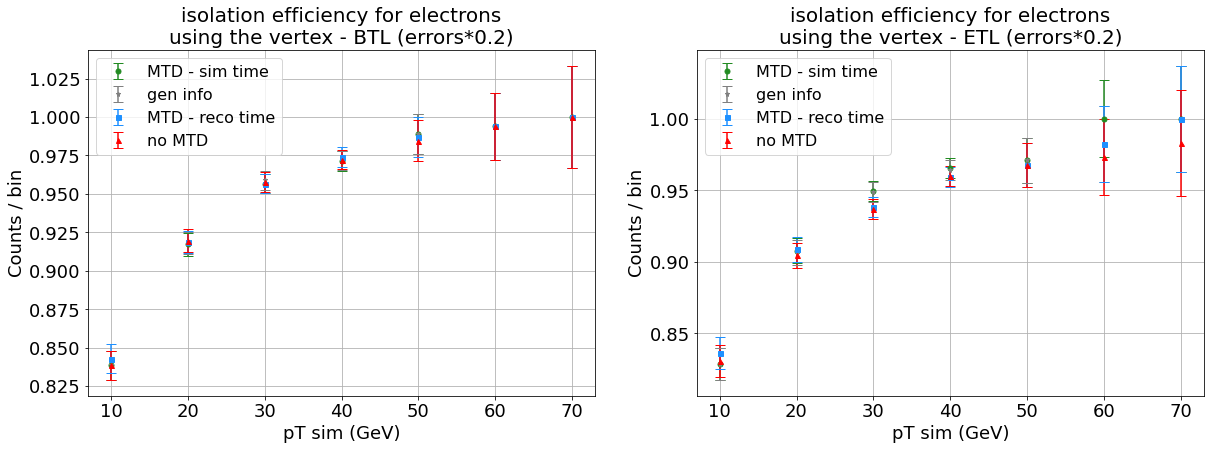

In [89]:
bins=np.array([10,20,30,40,50,60,70,80])
pt_tot, bins = np.histogram(ele_pt_B, bins=bins)

MTD_sim, err_sim_MTD = list2hist(ele_sim_pt_MTD_B, pt_tot, bins, SCALE)
MTD_gen, err_gen_MTD = list2hist(ele_gen_pt_MTD_B, pt_tot, bins, SCALE)
MTD, err_MTD = list2hist(ele_pt_MTD_B, pt_tot, bins, SCALE)
noMTD, err_noMTD = list2hist(ele_pt_noMTD_B, pt_tot, bins, SCALE)

#plt.style.use(hep.style.CMS)
plt.figure(figsize=(20,14))
plt.subplot(221)
plt.errorbar(bins[:-1], MTD_sim, err_sim_MTD, c="forestgreen", label ="MTD - sim time", fmt = "o", markersize=5, mfc="forestgreen", mec="forestgreen", ecolor="forestgreen", capsize=5, linestyle='')
plt.errorbar(bins[:-1], MTD_gen, err_gen_MTD, c="grey", label ="gen info", fmt = "*", markersize=5, mfc="grey", mec="grey", ecolor="grey", capsize=5, linestyle='')
plt.errorbar(bins[:-1], MTD, err_MTD, c="dodgerblue", label ="MTD - reco time", fmt = "s", markersize=5, mfc="dodgerblue", mec="dodgerblue", ecolor="dodgerblue", capsize=5, linestyle='')
plt.errorbar(bins[:-1], noMTD, err_noMTD, c="red", label ="no MTD", fmt = "^", markersize=5, mfc="red", mec="red", ecolor="red", capsize=5, linestyle='')
plt.title("isolation efficiency for electrons\nusing the vertex - BTL (errors*0.2)")
plt.xlabel("pT sim (GeV)")
plt.ylabel("Counts / bin")
plt.grid()
plt.legend(loc="upper left")

################################

pt_tot, bins = np.histogram(ele_pt_E, bins=bins)

MTD_sim, err_sim_MTD = list2hist(ele_sim_pt_MTD_E, pt_tot, bins, SCALE)
MTD_gen, err_gen_MTD = list2hist(ele_gen_pt_MTD_E, pt_tot, bins, SCALE)
MTD, err_MTD = list2hist(ele_pt_MTD_E, pt_tot, bins, SCALE)
noMTD, err_noMTD = list2hist(ele_pt_noMTD_E, pt_tot, bins, SCALE)

plt.subplot(222)
plt.errorbar(bins[:-1], MTD_sim, err_sim_MTD, c="forestgreen", label ="MTD - sim time", fmt = "o", markersize=5, mfc="forestgreen", mec="forestgreen", ecolor="forestgreen", capsize=5, linestyle='')
plt.errorbar(bins[:-1], MTD_gen, err_gen_MTD, c="grey", label ="gen info", fmt = "*", markersize=5, mfc="grey", mec="grey", ecolor="grey", capsize=5, linestyle='')
plt.errorbar(bins[:-1], MTD, err_MTD, c="dodgerblue", label ="MTD - reco time", fmt = "s", markersize=5, mfc="dodgerblue", mec="dodgerblue", ecolor="dodgerblue", capsize=5, linestyle='')
plt.errorbar(bins[:-1], noMTD, err_noMTD, c="red", label ="no MTD", fmt = "^", markersize=5, mfc="red", mec="red", ecolor="red", capsize=5, linestyle='')
plt.title("isolation efficiency for electrons\nusing the vertex - ETL (errors*0.2)")
plt.xlabel("pT sim (GeV)")
plt.ylabel("Counts / bin")
plt.grid()
plt.legend(loc="upper left")

plt.show()

### isolation

In [70]:
ele_iso_noMTD_B, ele_iso_MTD_B, ele_sim_iso_MTD_B, ele_gen_iso_MTD_B = vertexisolation(ele_prompt[ele_barrel], ele_track[ele_barrel], ele_sim_pt[ele_barrel], 
                          ele_dz[ele_barrel], ele_dxy[ele_barrel], track_sim_pt[ele_barrel], track_dz_ele[ele_barrel], track_sim_time[ele_barrel], 
                          ele_sim_time[ele_barrel], track_time[ele_barrel], track_timeErr[ele_barrel], vertex_time, vertex_timeErr, 
                          track_mva[ele_barrel], ele_mva[ele_barrel], track_gen_matched[ele_barrel], 
                          NSIGMA=3,ELE_DZ=0.2)

ele_iso_noMTD_E, ele_iso_MTD_E, ele_sim_iso_MTD_E, ele_gen_iso_MTD_E = vertexisolation(ele_prompt[~ele_barrel], ele_track[~ele_barrel], ele_sim_pt[~ele_barrel], 
                          ele_dz[~ele_barrel], ele_dxy[~ele_barrel], track_sim_pt[~ele_barrel], 
                          track_dz_ele[~ele_barrel], track_sim_time[~ele_barrel], ele_sim_time[~ele_barrel], track_time[~ele_barrel], track_timeErr[~ele_barrel], 
                          vertex_time, vertex_timeErr, track_mva[~ele_barrel], ele_mva[~ele_barrel], track_gen_matched[~ele_barrel], 
                          NSIGMA=3,ELE_DZ=0.2)

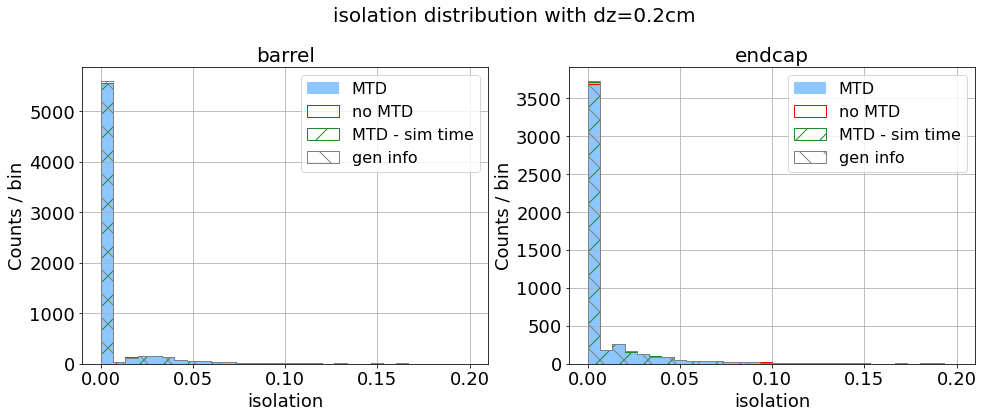

In [71]:
bins=30

plt.figure(figsize=(16,12))
plt.suptitle("isolation distribution with dz=0.2cm", fontsize=20, y=0.95)

ran=(0,0.2)
plt.subplot(221)
plt.hist(ele_iso_MTD_B, bins=30, color='dodgerblue', label="MTD", alpha=0.5, range=ran)
plt.hist(ele_iso_noMTD_B, bins=bins, color='red', label="no MTD", histtype="step", range=ran)
plt.hist(ele_sim_iso_MTD_B, bins=bins, color='forestgreen', label="MTD - sim time", histtype="step", range=ran, hatch="/")
plt.hist(ele_gen_iso_MTD_B, bins=bins, color='grey', label="gen info", histtype="step", range=ran, hatch="\\")
plt.title("barrel")
plt.xlabel("isolation")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

ran2=ran
plt.subplot(222)
plt.hist(ele_iso_MTD_E, bins=bins, color='dodgerblue', label="MTD", alpha=0.5, range=ran2)
plt.hist(ele_iso_noMTD_E, bins=bins, color='red', label="no MTD", histtype="step", range=ran2)
plt.hist(ele_sim_iso_MTD_E, bins=bins, color='forestgreen', label="MTD - sim time", histtype="step", range=ran2, hatch="/")
plt.hist(ele_gen_iso_MTD_E, bins=bins, color='grey', label="gen info", histtype="step", range=ran2, hatch="\\")
plt.title("endcap")
plt.xlabel("isolation")
plt.ylabel("Counts / bin")
plt.grid() 
plt.legend()

plt.show()

In [84]:
np.savetxt("vtx_sig_ele_iso_noMTD_B.txt", ele_iso_noMTD_B)
np.savetxt("vtx_sig_ele_iso_noMTD_E.txt", ele_iso_noMTD_E)
np.savetxt("vtx_sig_ele_iso_MTD_B.txt", ele_iso_MTD_B)
np.savetxt("vtx_sig_ele_iso_MTD_E.txt", ele_iso_MTD_E)
np.savetxt("vtx_sig_ele_sim_iso_MTD_B.txt", ele_sim_iso_MTD_B)
np.savetxt("vtx_sig_ele_sim_iso_MTD_E.txt", ele_sim_iso_MTD_E)
np.savetxt("vtx_sig_ele_gen_iso_MTD_B.txt", ele_gen_iso_MTD_B)
np.savetxt("vtx_sig_ele_gen_iso_MTD_E.txt", ele_gen_iso_MTD_E)

In [73]:
#iso_step = np.linspace(0.02, 0.2, 50)
iso_sig_noMTD_B, iso_sig_MTD_B, iso_sig_sim_MTD_B, iso_sig_gen_MTD_B = iso_for_plot(ele_iso_noMTD_B, ele_iso_MTD_B, ele_sim_iso_MTD_B, ele_gen_iso_MTD_B)
iso_sig_noMTD_E, iso_sig_MTD_E, iso_sig_sim_MTD_E, iso_sig_gen_MTD_E = iso_for_plot(ele_iso_noMTD_E, ele_iso_MTD_E, ele_sim_iso_MTD_E, ele_gen_iso_MTD_E)

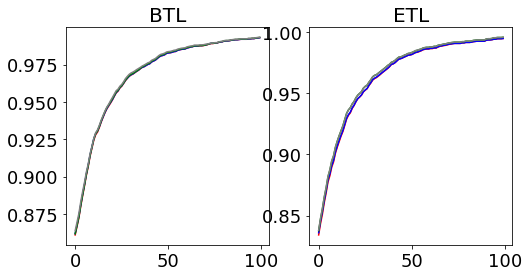

In [83]:
plt.figure(figsize=(8,4))
plt.subplot(121)
plt.title("BTL")
plt.plot(iso_sig_noMTD_B, c="r")
plt.plot(iso_sig_MTD_B, c="b")
plt.plot(iso_sig_sim_MTD_B, c="green")
plt.plot(iso_sig_gen_MTD_B, c="grey")

plt.subplot(122)
plt.title("ETL")
plt.plot(iso_sig_noMTD_E, c="r")
plt.plot(iso_sig_MTD_E, c="b")
plt.plot(iso_sig_sim_MTD_E, c="green")
plt.plot(iso_sig_gen_MTD_E, c="grey")

plt.show()

## dt distribution with the vertex

In [81]:
ele_dt_B, ele_reco_dt_B, nosim_B, noreco_B = vertex_dt_distribution(ele_prompt[ele_barrel], ele_track[ele_barrel], ele_dz[ele_barrel], ele_dxy[ele_barrel], ele_sim_time[ele_barrel], 
                                                                    vertex_time, vertex_timeErr, track_dz_ele[ele_barrel], track_sim_time[ele_barrel], track_time[ele_barrel], 
                                                                    track_timeErr[ele_barrel], ELE_DZ=0.2, SIGNAL=True)
ele_dt_E, ele_reco_dt_E, nosim_E, noreco_E = vertex_dt_distribution(ele_prompt[~ele_barrel], ele_track[~ele_barrel], ele_dz[~ele_barrel], ele_dxy[~ele_barrel], ele_sim_time[~ele_barrel], 
                                                                    vertex_time, vertex_timeErr, track_dz_ele[~ele_barrel], track_sim_time[~ele_barrel], track_time[~ele_barrel], 
                                                                    track_timeErr[~ele_barrel], ELE_DZ=0.2, SIGNAL=True)

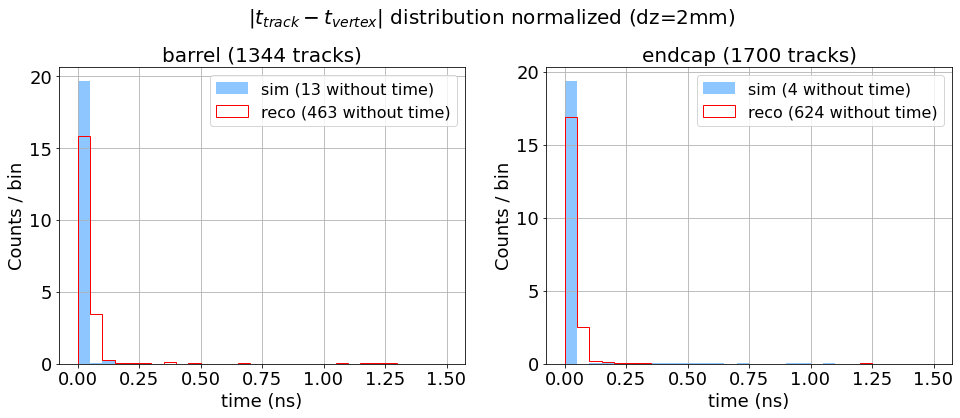

In [82]:
bins=30

plt.figure(figsize=(16,12))
plt.suptitle("$|t_{track}-t_{vertex}|$ distribution normalized (dz=2mm)", fontsize=20, y=0.95)

plt.subplot(221)
ran = (0,1.5)
nt = len(ele_dt_B[ele_dt_B < -98])
plt.hist(ele_dt_B, bins=30, color='dodgerblue', label=f'sim ({nosim_B} without time)', alpha=0.5, range=ran, density=True)
nt = len(ele_reco_dt_B[ele_reco_dt_B == 0])
plt.hist(ele_reco_dt_B, bins=bins, color='red', label=f'reco ({noreco_B} without time)', histtype="step", range=ran, density=True)
plt.title(f'barrel ({len(ele_dt_B)} tracks)')
plt.xlabel("time (ns)")
plt.ylabel("Counts normalized / bin")
plt.grid() 
plt.legend()

plt.subplot(222)
nt = len(ele_dt_E[ele_dt_E < -98])
plt.hist(ele_dt_E, bins=bins, color='dodgerblue', label=f'sim ({nosim_E} without time)', alpha=0.5, range=ran, density=True)
nt = len(ele_reco_dt_E[ele_reco_dt_E == 0])
plt.hist(ele_reco_dt_E, bins=bins, color='red', label=f'reco ({noreco_E} without time)', histtype="step", range=ran, density=True)
plt.title(f'endcap ({len(ele_dt_E)} tracks)')
plt.xlabel("time (ns)")
plt.ylabel("Counts normalized / bin")
plt.grid() 
plt.legend()

plt.show()

## $(t_R - t_S) / \sigma_t$

In [85]:
ELE_DZ = 0.2

ele_delta_t = []
track_delta_t = []

for ev in range(len(event)):
    for ele in range(len(ele_prompt[ev])):
        if (ele_dz[ev][ele]>0.5 or ele_dxy[ev][ele]>0.2):
            continue
        if not ele_prompt[ev][ele]:
            continue
        if ele_sim_time[ev][ele]!=-1 and ele_timeErr[ev][ele]>0:
            ele_delta_t.append((-ele_sim_time[ev][ele]+ele_time[ev][ele])/ele_timeErr[ev][ele])
        for trk in range(len(track_pt[ev][ele])):
            if track_mva[ev][ele][trk]<0.5:
                continue
            # cut in dz with ele, tunable
            if (track_dz_ele[ev][ele][trk] > ELE_DZ):
                continue
            if track_sim_time[ev][ele][trk]!=-1 and track_timeErr[ev][ele][trk]>0:
                track_delta_t.append((-track_sim_time[ev][ele][trk]+track_time[ev][ele][trk])/track_timeErr[ev][ele][trk])


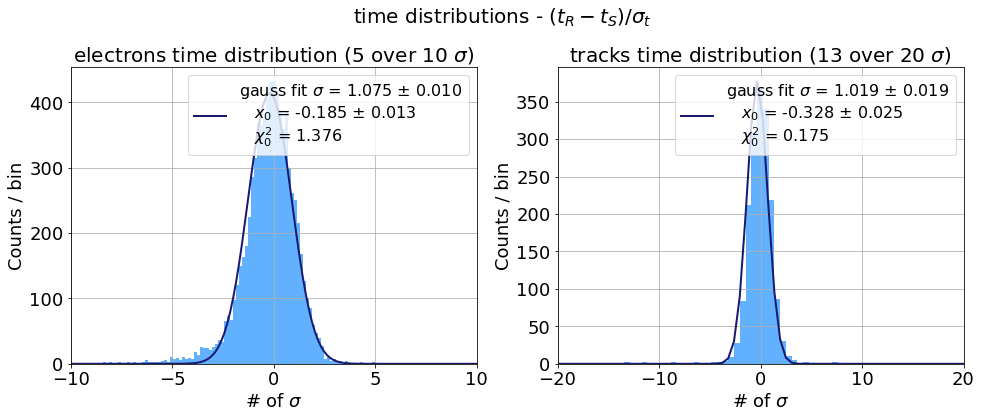

In [87]:
BINS=200

plt.figure(figsize=(16,12))
plt.suptitle("time distributions - $(t_R - t_S) / \sigma_t$", fontsize=20, y=0.95)

plt.subplot(221)
res, chi2 = gauss_fit_and_plot(ele_delta_t, init_parms=[400,0,1], label="ele", bins=BINS)
AA = np.array(ele_delta_t)
ot = len(AA[AA>10])+len(AA[AA<-10])
plt.title(f'electrons time distribution ({ot} over 10 $\sigma$)')
plt.xlabel("# of $\sigma$")
plt.ylabel("Counts / bin")
plt.xlim(-10,10)
# plt.legend()
# plt.grid() 

plt.subplot(222)
res_sim, chi2_sim = gauss_fit_and_plot(track_delta_t, init_parms=[400,0,1], label="tracks", bins=BINS)
AA = np.array(track_delta_t)
ot = len(AA[AA>20])+len(AA[AA<-20])
plt.title(f'tracks time distribution ({ot} over 20 $\sigma$)')
plt.xlabel("# of $\sigma$")
plt.ylabel("Counts / bin")
# plt.legend()
plt.xlim(-20,20)
# plt.grid() 

plt.show()